In [1]:
import sys
sys.path.append('../src/gnn_tracking')
from preprocessing.point_cloud_builder import PointCloudBuilder
from utils.plotting import GraphPlotter
from utils.plotting import EventPlotter
from utils.plotting import PointCloudPlotter

/home/jdezoort/.conda/envs/pyg2/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


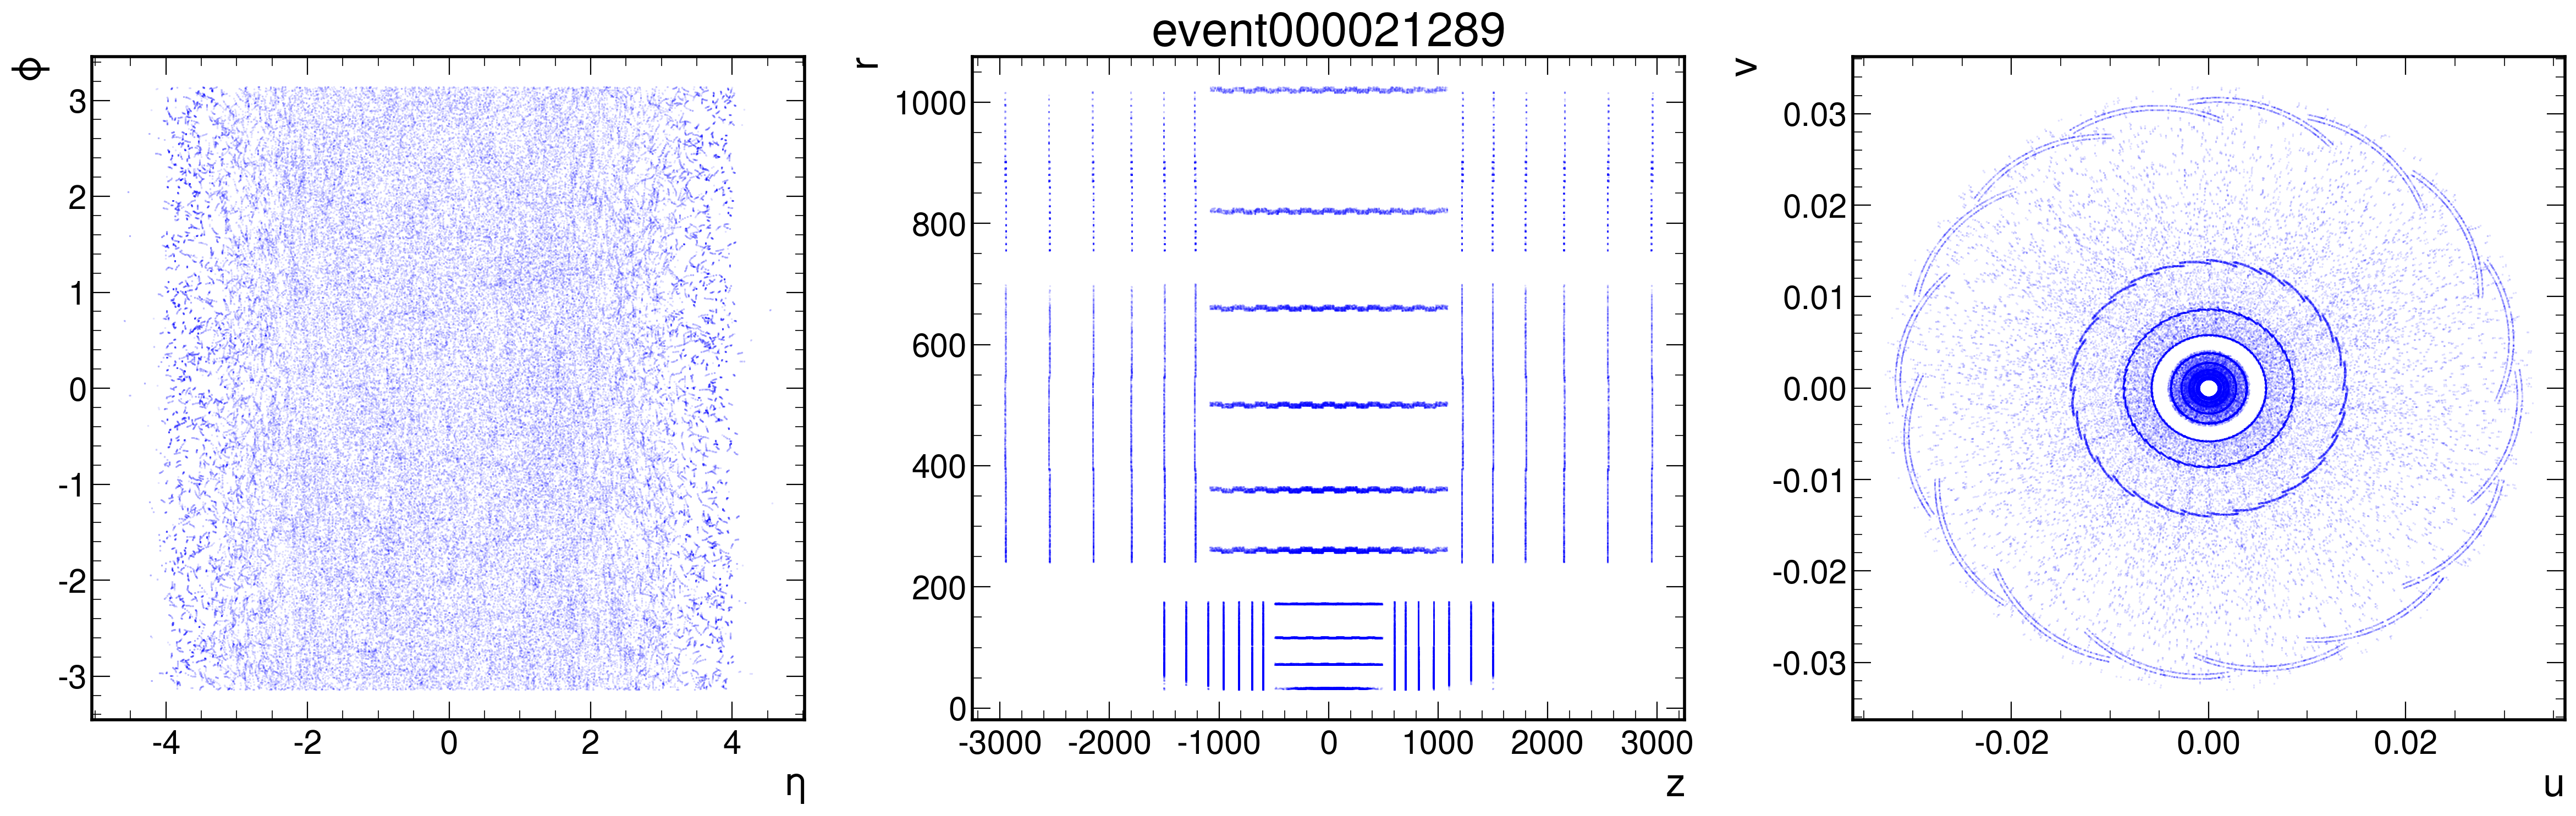

In [2]:
n_evts, n_sectors = 10, 64
indir='/tigress/jdezoort/codalab/train_1'
event_plotter = EventPlotter(indir=indir)
event_plotter.plot_ep_rv_uv(evtid=21289)

In [3]:
pc_builder = PointCloudBuilder(indir='/tigress/jdezoort/codalab/train_1', outdir='../point_clouds/',
                            n_sectors=n_sectors, pixel_only=True, redo=False, measurement_mode=True, thld=0.9)
pc_builder.process(n=10, verbose=False)

Processing /tigress/jdezoort/codalab/train_1/event000021289
Processing /tigress/jdezoort/codalab/train_1/event000021054
Processing /tigress/jdezoort/codalab/train_1/event000021371
Processing /tigress/jdezoort/codalab/train_1/event000021460
Processing /tigress/jdezoort/codalab/train_1/event000021612
Processing /tigress/jdezoort/codalab/train_1/event000021949
Processing /tigress/jdezoort/codalab/train_1/event000021853
Processing /tigress/jdezoort/codalab/train_1/event000021164
Processing /tigress/jdezoort/codalab/train_1/event000021475
Processing /tigress/jdezoort/codalab/train_1/event000021135
Output statistics: {'n_hits': 59611, 'n_particles': 8804, 'n_noise': 3688, 'n_sector_hits': 75299, 'n_sector_particles': 18864}
sector_size: 945.2604+/-93.8760
extended_sector_size: 1198.3491+/-106.2316
sector_size_ratio: 1.2695+/-0.0325
unique_pids: 297.8021+/-17.9029
majority_contained_0.9GeV: 0.9129+/-0.0570


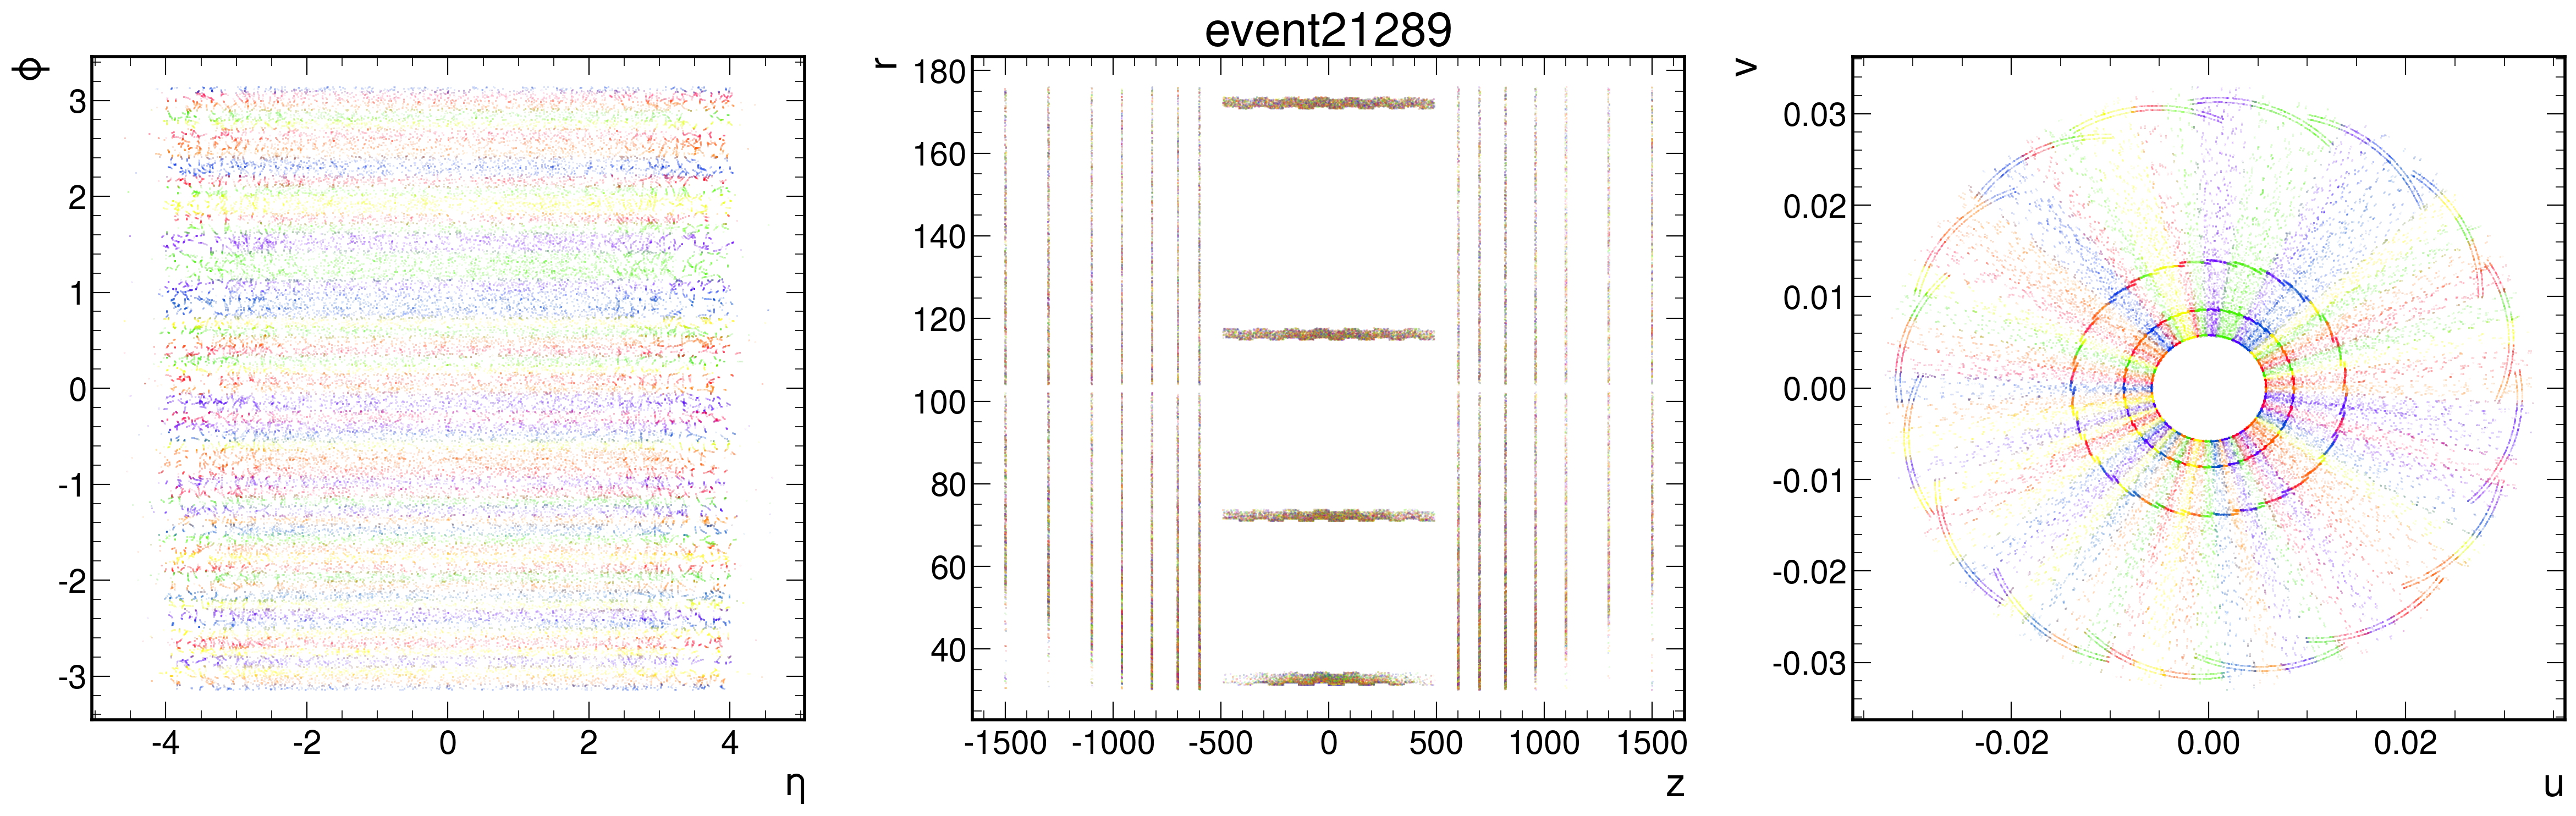

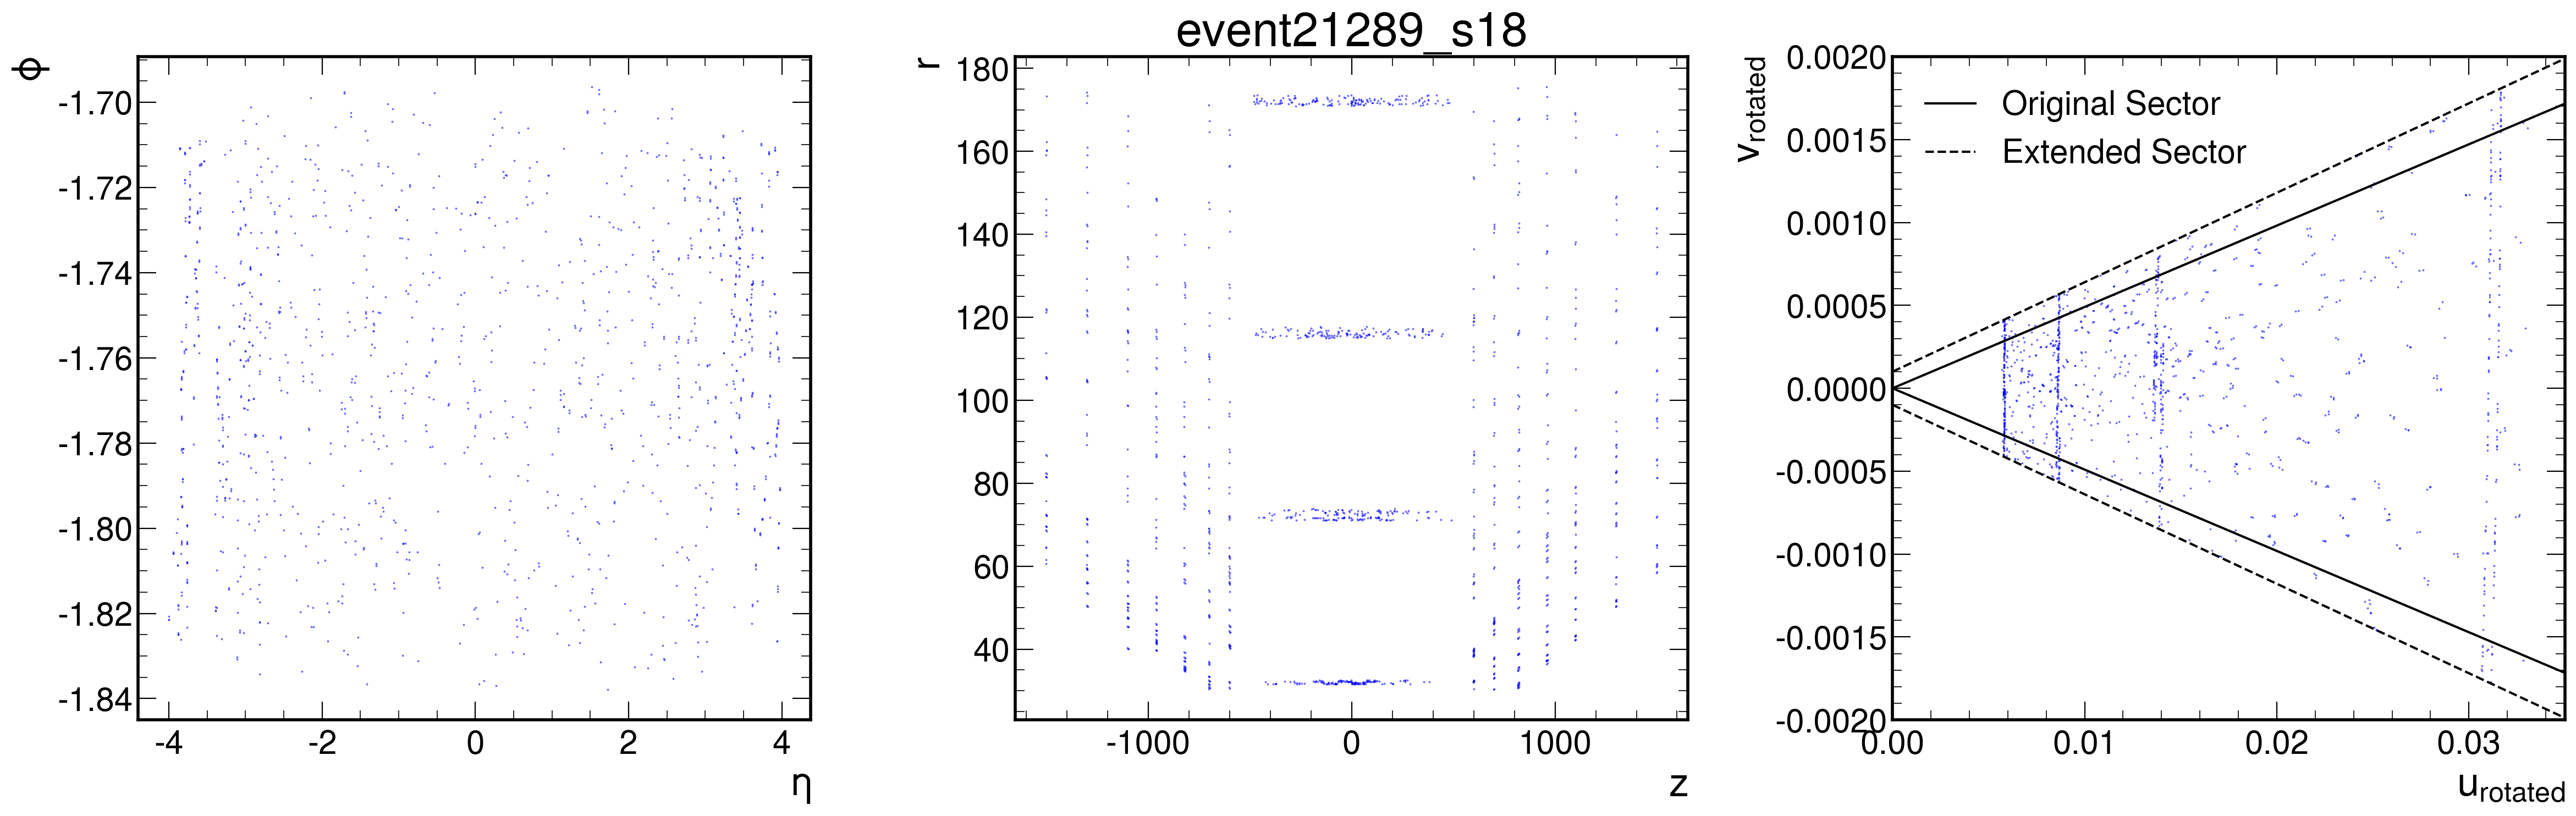

In [4]:
pc_plotter = PointCloudPlotter('../point_clouds', 
                               n_sectors=pc_builder.n_sectors)
pc_plotter.plot_ep_rv_uv_all_sectors(21289)
pc_plotter.plot_ep_rv_uv_with_boundary(21289, 18, 
                                       pc_builder.sector_di,
                                       pc_builder.sector_ds)

In [ ]:
from graph_construction.graph_builder import GraphBuilder
graph_builder = GraphBuilder('../point_clouds/', '../graphs', redo=False)
graph_builder.process(verbose=False, n=n_evts*n_sectors)

Relabeled 2 edges crossing from barrel to endcaps.
Updated y has 968/18066 true edges.
Relabeled 1 edges crossing from barrel to endcaps.
Updated y has 897/11870 true edges.
Relabeled 3 edges crossing from barrel to endcaps.
Updated y has 1146/23130 true edges.
Relabeled 1 edges crossing from barrel to endcaps.
Updated y has 705/7252 true edges.
Relabeled 1 edges crossing from barrel to endcaps.
Updated y has 867/14085 true edges.
Relabeled 2 edges crossing from barrel to endcaps.
Updated y has 907/12172 true edges.
Relabeled 2 edges crossing from barrel to endcaps.
Updated y has 1220/18991 true edges.
Relabeled 1 edges crossing from barrel to endcaps.
Updated y has 1127/11353 true edges.
Relabeled 2 edges crossing from barrel to endcaps.
Updated y has 812/9245 true edges.
Relabeled 1 edges crossing from barrel to endcaps.
Updated y has 958/11630 true edges.
Relabeled 1 edges crossing from barrel to endcaps.
Updated y has 1054/15697 true edges.
Relabeled 1 edges crossing from barrel to

In [ ]:
g = GraphPlotter()
f='data21289_s18.pt'
g.plot_rz(graph_builder.data_list[f], f)